# What to do?
Detecting Hate Tweets or offensive language  on  Twitter  using Machine learning methods like Bag or Words of TFIDF. Find out which classification algorithm suits best for the same.

# A gist of what i did...
1. imported the necessary libraries.
2. read the dataset.
3. used functions like info(), describe(), isnull() to know more about the dataset.
4. used pie plot to show the distribution of class.
5. cleaned the tweets and added a new column with the name tidy_tweets which contains these clean tweets.
6. removed punctuations, numeric and stopwords from tidy_tweets.
7. next i tokenized and stemmed these tweets in tidy_tweets.
8. next i made a function to make a word cloud of these tidy_tweets and diplayed the word cloud on screen.
9. made separate datafarmes for hate tweets, offensive tweets and tweets which are neither of the two and displayed their word clouds on screen.
10. made a function to find hashtags and then found hashtags from dataframe containing hate tweets, offensive tweets and neither of the two.
11. next, found out the word frequency of each hashtags in these dataframes.
12. displayed a plot of these hashtags using barplot.
13. extracted features from clean tweets using bag of words word embedding. Made a bag-of-words feature matrix and displayed this matrix on screen.
14. next i split the data into training and validation set and used xgboost and linear regression as classifiers to find out the f1-score of these models.
15. Next, i made a comoarison table which contains the f1-score of these two models and then plotted these scores to visualize the comparison.

# Let's dive into the code...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import numpy as np
import nltk
import seaborn as sns

In [2]:
df = pd.read_csv(r'covid_19_hate_speech-master/covid_19_hate_speech-master/hate_speech_labelled_data/labeled_data.csv')
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


Each data file contains 5 columns:

`count` = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

`hate_speech` = number of CF users who judged the tweet to be hate speech.

`offensive_language` = number of CF users who judged the tweet to be offensive.

`neither` = number of CF users who judged the tweet to be neither offensive nor non-offensive.

`class` = class label for majority of CF users.
  0 - hate speech
  1 - offensive  language
  2 - neither

In [3]:
df = df.iloc[:,1:]   #removed unnamed column

In [4]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum().sum()  #checking for null values

0

In [7]:
df.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


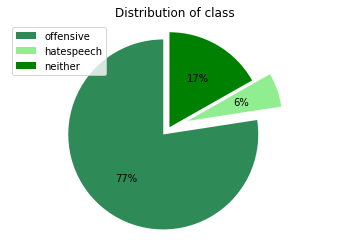

In [8]:
labels =['offensive','hatespeech','neither'] 
sizes = [len(df[df['class'] ==1]), len(df[df['class'] ==0]), len(df[df['class'] ==2])]
colors = ['seagreen','lightgreen','green']
plt.pie(sizes, colors = colors, startangle=90, autopct='%1.0f%%', explode= [0.1,0.2,0.0])
plt.legend(labels)
plt.title('Distribution of class')
plt.axis('equal')
plt.show()

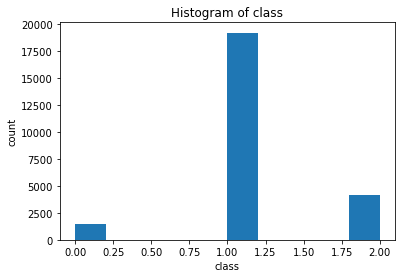

In [9]:
df['class'].hist(grid= False)
plt.title('Histogram of class')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

In [10]:
#cleaning tweets
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [11]:
df['Tidy_Tweets'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

df.head()

,count,hate_speech,offensive_language,neither,class,tweet,Tidy_Tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...


In [12]:
#removing punctuations, numbers, special characters
df['Tidy_Tweets'] = df['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

df.head(10)

,count,hate_speech,offensive_language,neither,class,tweet,Tidy_Tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT As a woman you shouldn t complain abo...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT boy dats cold tyga dwn bad for cu...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT Dawg RT You ever fuck a bitc...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT The shit you hear about me ...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",The shit just blows me c...
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",I can not just sit up and HATE on ano...
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,# cause I m tired of you big bitche...
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",amp you might not get ya bitch back amp ...
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbies include fighting Mariam bitch


In [13]:
#removing short words
df['Tidy_Tweets'] = df['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

df.head(10)

,count,hate_speech,offensive_language,neither,class,tweet,Tidy_Tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldn complain about cleaning your hou...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dats cold tyga cuffin place
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg ever fuck bitch start confused shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear about might true might faker than bi...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",shit just blows claim faithful down somebody s...
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",just HATE another bitch much shit going
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause tired bitches coming skinny girls
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",might bitch back thats that
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbies include fighting Mariam bitch


In [14]:
#tokenizing words
tokenized_tweet = df['Tidy_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()

0    [woman, shouldn, complain, about, cleaning, yo...
1                    [dats, cold, tyga, cuffin, place]
2     [Dawg, ever, fuck, bitch, start, confused, shit]
3                                 [look, like, tranny]
4    [shit, hear, about, might, true, might, faker,...
Name: Tidy_Tweets, dtype: object

In [15]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [woman, shouldn, complain, about, clean, your,...
1                     [dat, cold, tyga, cuffin, place]
2       [dawg, ever, fuck, bitch, start, confus, shit]
3                                 [look, like, tranni]
4    [shit, hear, about, might, true, might, faker,...
Name: Tidy_Tweets, dtype: object

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['Tidy_Tweets'] = tokenized_tweet
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,Tidy_Tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldn complain about clean your hous s...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dat cold tyga cuffin place
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start confus shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear about might true might faker than bi...


In [17]:
#function to create wordcloud
def wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(width = 800, height = 800, background_color="white", max_words= 3000, 
                  stopwords= stopwords, repeat= True)
    wc.generate(str(text))
    #wc.to_file("wc.png")
    print("word cloud saved successfully!")
    #path = "wc.png"
    #display(Image.open(path))
    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad = 0)
  
    plt.show()

word cloud saved successfully!


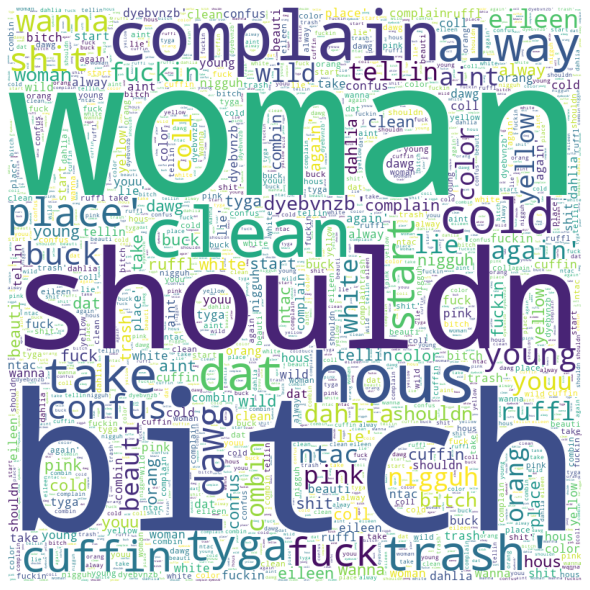

In [18]:
#Creating wordcloud for all tweets
wordcloud(df['Tidy_Tweets'].values)

In [18]:
df_hate =pd.DataFrame(df[df['class']==0]['Tidy_Tweets'])
df_hate.head()

,Tidy_Tweets
85,queer gaywad
89,alsarabsss beaner tell mexican
110,fuck blacklist hold #tehgodclan anyway http xu...
184,lmfaoooo hate black peopl http rnvd nlcdr thi ...
202,least nigger http rgja cfoit lmfao


word cloud saved successfully!


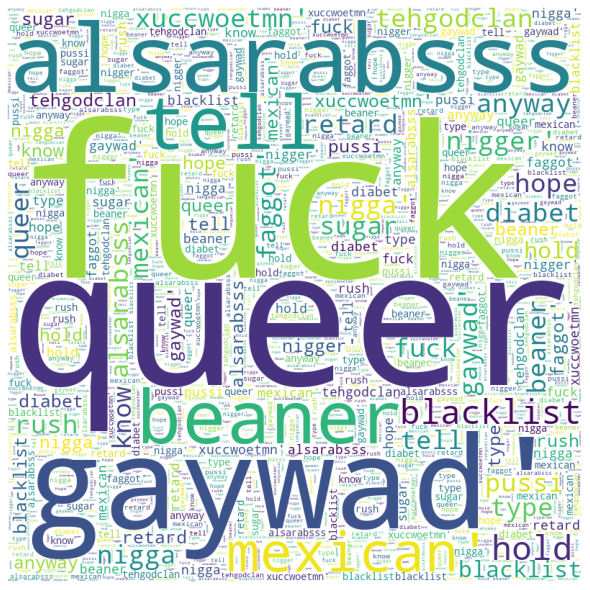

In [20]:
wordcloud(df_hate['Tidy_Tweets'].values)

In [19]:
df_off =pd.DataFrame(df[df['class']==1]['Tidy_Tweets'])
df_off.head()

,Tidy_Tweets
1,dat cold tyga cuffin place
2,dawg ever fuck bitch start confus shit
3,look like tranni
4,shit hear about might true might faker than bi...
5,shit just blow claim faith down somebodi still...


word cloud saved successfully!


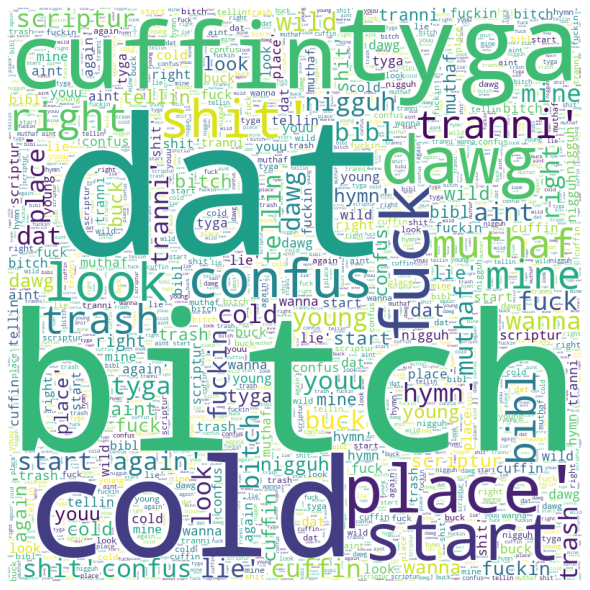

In [22]:
wordcloud(df_off['Tidy_Tweets'].values)

In [20]:
df_neither =pd.DataFrame(df[df['class']==2]['Tidy_Tweets'])
df_neither.head()

,Tidy_Tweets
0,woman shouldn complain about clean your hous s...
40,momma said pussi cat insid doghous
63,simplyaddictedtoguy http woof woof scalli
66,http gzupfumev woof woof sole
67,lemmi oreo these dish oreo


word cloud saved successfully!


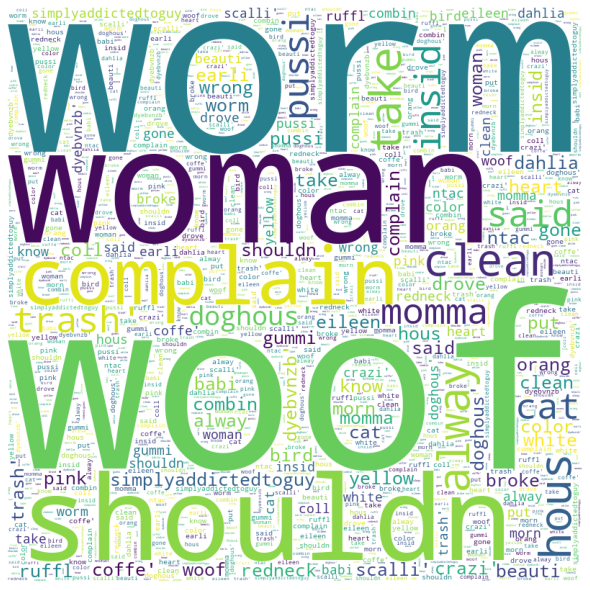

In [23]:
wordcloud(df_neither['Tidy_Tweets'].values)

In [21]:
#function to find hashtags
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [22]:
ht_hate = Hashtags_Extract(df['Tidy_Tweets'][df['class']==0])

ht_hate

[[],
 [],
 ['tehgodclan'],
 [],
 [],
 [],
 [],
 ['gerryshalloweenparti'],
 [],
 [],
 ['blondeproblem'],
 [],
 [],
 ['shitmybosssay'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['azmonsoon', 'tcot', 'teaparti', 'azflood'],
 ['california'],
 ['california', 'oklahoma'],
 ['dtla'],
 ['dutch'],
 ['dutch', 'newyorkc'],
 ['iowa'],
 ['jesuschrist', 'faggot', 'period', 'sonofgod'],
 ['minnesota'],
 ['reasonswecantbetogeth'],
 ['rebelsci', 'faggot', 'rome'],
 ['slightlyadjust'],
 ['somethingigetalot'],
 ['southcarolina'],
 ['thingsiwillteachmychild'],
 ['trayvonmartin'],
 ['tweetlikepontiacholm'],
 ['vinitahegwood', 'tcot'],
 ['virginia'],
 ['westvirginia'],
 ['faggot', 'scientif', 'cancer'],
 ['firefight'],
 ['milesthompson', 'goauch', 'wetback'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['dope'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['realtalk'],
 [],
 [],
 ['faggot', 'respect'],
 [],
 [

In [23]:
#unnesting it
ht_hate_unnest = sum(ht_hate,[])

In [24]:
ht_hate_unnest

['tehgodclan',
 'gerryshalloweenparti',
 'blondeproblem',
 'shitmybosssay',
 'azmonsoon',
 'tcot',
 'teaparti',
 'azflood',
 'california',
 'california',
 'oklahoma',
 'dtla',
 'dutch',
 'dutch',
 'newyorkc',
 'iowa',
 'jesuschrist',
 'faggot',
 'period',
 'sonofgod',
 'minnesota',
 'reasonswecantbetogeth',
 'rebelsci',
 'faggot',
 'rome',
 'slightlyadjust',
 'somethingigetalot',
 'southcarolina',
 'thingsiwillteachmychild',
 'trayvonmartin',
 'tweetlikepontiacholm',
 'vinitahegwood',
 'tcot',
 'virginia',
 'westvirginia',
 'faggot',
 'scientif',
 'cancer',
 'firefight',
 'milesthompson',
 'goauch',
 'wetback',
 'dope',
 'realtalk',
 'faggot',
 'respect',
 'wcw',
 'ferguson',
 'credibilityshot',
 'fergusonriot',
 'justic',
 'butthurt',
 'hesgay',
 'isi',
 'faggot',
 'lordwillin',
 'dummi',
 'niggerfood',
 'niggerperson',
 'you',
 'are',
 'nigger',
 'twitterhoney',
 'sorrynotsorri',
 'swaagg',
 'fazeisgay',
 'cali',
 'okiecop',
 'justsayin',
 'racist',
 'trash',
 'thug',
 'ferguson',
 '

In [25]:
ht_offense = Hashtags_Extract(df['Tidy_Tweets'][df['class']==1])

ht_offense

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['shot'],
 [],
 [],
 ['sevenon'],
 [],
 [],
 [],
 ['happyhumpday'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['ahmesehwet'],
 ['eaglesn', 'eagl'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['earlychristma'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['stopwhitepeopl'],
 ['cowboysn'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['freemoneymel'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['oomf'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['fix'],
 [],
 [],
 [],
 ['kingofthehil'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['wutkinda'

In [26]:
#unnesting it
ht_offense_unnest = sum(ht_offense,[])
ht_offense_unnest

['shot',
 'sevenon',
 'happyhumpday',
 'ahmesehwet',
 'eaglesn',
 'eagl',
 'earlychristma',
 'stopwhitepeopl',
 'cowboysn',
 'freemoneymel',
 'oomf',
 'fix',
 'kingofthehil',
 'wutkinda',
 'hoesaintloy',
 'real',
 'pisc',
 'newsatquest',
 'mtvhottest',
 'damn',
 'godprotectshisangel',
 'scalli',
 'sneakersex',
 'sockfetish',
 'sniff',
 'trainersex',
 'wwyd',
 'yourenotmytyp',
 'chav',
 'freshrhym',
 'jerksquad',
 'slowstir',
 'beforeiselfdestruct',
 'thankyoupaulforconfirminglarri',
 'nottinghil',
 'riptallt',
 'tupac',
 'smile',
 'remix',
 'afterearth',
 'snl',
 'hoe',
 'shitfahdsay',
 'redskin',
 'nfl',
 'concuss',
 'joke',
 'fuckgm',
 'alexfromtarget',
 'chrisfromwalmart',
 'alexfromtarget',
 'anncoult',
 'obama',
 'syria',
 'cunt',
 'asagiraff',
 'bob',
 'bangbangbirdgang',
 'bartend',
 'bartend',
 'bestsongtohavesexto',
 'bangbang',
 'bitchslapthursday',
 'bout',
 'aintnolevelz',
 'burnnotic',
 'celebrityleakedphoto',
 'nsa',
 'muslim',
 'bitch',
 'christianbal',
 'mose',
 'retard

In [27]:
# word frequency for hate hashtags
word_freq_hate = nltk.FreqDist(ht_hate_unnest)

word_freq_hate

FreqDist({'faggot': 12, 'tcot': 9, 'losangel': 6, 'isi': 5, 'california': 4, 'ferguson': 4, 'teaparti': 2, 'dutch': 2, 'jesuschrist': 2, 'period': 2, ...})

In [28]:
#creating a dataframe for word frequency of hate hashtags
df_hatetweet = pd.DataFrame({'Hashtags':list(word_freq_hate.keys()),'Count':list(word_freq_hate.values())})

df_hatetweet.head(10)

,Hashtags,Count
0,tehgodclan,1
1,gerryshalloweenparti,1
2,blondeproblem,1
3,shitmybosssay,1
4,azmonsoon,1
5,tcot,9
6,teaparti,2
7,azflood,1
8,california,4
9,oklahoma,1


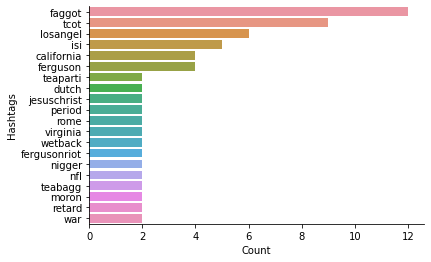

In [29]:
#plotting a bar plot for these hashtags
df_hate_plot = df_hatetweet.nlargest(20,columns='Count')

sns.barplot(data=df_hate_plot,y='Hashtags',x='Count')
sns.despine()

In [30]:
word_freq_off = nltk.FreqDist(ht_offense_unnest) 
# word frequency for offensive hashtags
word_freq_off

FreqDist({'iphon': 48, 'xxx': 47, 'porn': 45, 'android': 45, 'ipad': 45, 'sex': 45, 'bitch': 26, 'pussi': 16, 'tcot': 12, 'retard': 10, ...})

In [31]:
#creating a dataframe for word frequency of offensive hashtags
df_offtweet = pd.DataFrame({'Hashtags':list(word_freq_off.keys()),'Count':list(word_freq_off.values())})

df_offtweet.head(10)

,Hashtags,Count
0,shot,1
1,sevenon,1
2,happyhumpday,1
3,ahmesehwet,1
4,eaglesn,2
5,eagl,2
6,earlychristma,1
7,stopwhitepeopl,1
8,cowboysn,2
9,freemoneymel,1


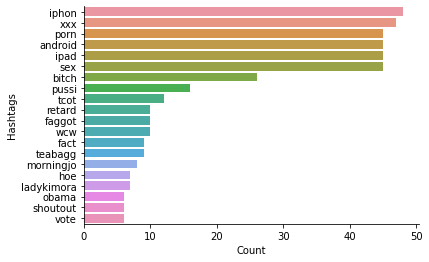

In [32]:
#plotting a bar plot for these hashtags
df_off_plot = df_offtweet.nlargest(20,columns='Count')

sns.barplot(data=df_off_plot,y='Hashtags',x='Count')
sns.despine()

In [33]:
#extracting features from clean tweets
from sklearn.feature_extraction.text import CountVectorizer
# using bag-of-words word embedding
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24780,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
24781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_bow.shape

(24783, 1000)

In [35]:
#using features for traing set
train_bow = bow[:17348]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
#splitting the data into training and validation set
from sklearn.model_selection import train_test_split
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow, df.iloc[:17348,:]['class'],test_size=0.3,random_state=2)

In [37]:
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
model_bow = XGBClassifier(random_state=22,learning_rate=0.9, use_label_encoder = False, eval_metric = 'merror')


In [38]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.9, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [46]:
xgb = model_bow.predict_proba(x_valid_bow)

xgb

array([[2.2277215e-02, 9.7400427e-01, 3.7184597e-03],
       [7.9106428e-03, 1.2140884e-01, 8.7068051e-01],
       [8.4853256e-03, 9.8808658e-01, 3.4281479e-03],
       ...,
       [7.0625003e-03, 9.9236131e-01, 5.7622080e-04],
       [3.3852942e-03, 9.9646473e-01, 1.4993711e-04],
       [2.2661403e-02, 3.6912274e-02, 9.4042629e-01]], dtype=float32)

In [49]:

xgb=xgb[:]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int, average='weighted')

xgb_bow

0.7065127457147601

In [51]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [52]:
Log_Reg.fit(x_train_bow,y_train_bow)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [53]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[1.97102264e-03, 9.97960078e-01, 6.88991284e-05],
       [1.05646110e-02, 1.71292298e-01, 8.18143091e-01],
       [2.12780510e-02, 9.71397516e-01, 7.32443313e-03],
       ...,
       [1.71667009e-02, 9.81115293e-01, 1.71800602e-03],
       [1.87403724e-02, 9.80859111e-01, 4.00516560e-04],
       [1.53321915e-01, 1.07416890e-01, 7.39261195e-01]])

In [55]:
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int, average= 'weighted')

log_bow

0.704441955951063

In [57]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)']

score_1 = [log_bow,xgb_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,3)])

compare_1.T

,1,2
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words)
F1_Score,0.704442,0.706513


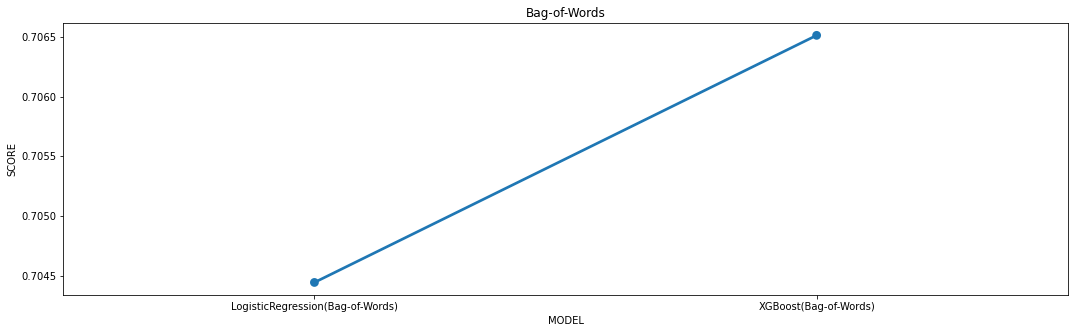

In [58]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

# Conclusion
From the above table we can see that XGBoost (bag-of words) has better F1-Score and thus performs better than LogisticRegression (bag-of-words).